In [194]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.utils import shuffle

In [195]:
df = pd.read_csv('data/boston.csv', header=0)
print(df.describe())

             CRIM         ZN       INDUS         CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO       LSTAT  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534   12.653063   
std     28.148861    2.1057

In [196]:
df.tail(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,7.88,11.9


In [197]:
ds = np.array(df.values)

In [198]:
print(ds.shape)
print(ds)

(506, 13)
[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 4.9800e+00 2.4000e+01]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 9.1400e+00 2.1600e+01]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 4.0300e+00 3.4700e+01]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 5.6400e+00 2.3900e+01]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 6.4800e+00 2.2000e+01]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 7.8800e+00 1.1900e+01]]


In [199]:
x_data_unscaled = ds[:,:12]
y_data = ds[:,12]

from sklearn.preprocessing import StandardScaler,MinMaxScaler

scaler = MinMaxScaler()

x_data = scaler.fit_transform(x_data_unscaled)

print(x_data,'\n x_data shape:', x_data.shape)
print(y_data, '\n y_data shape:', y_data.shape)

[[0.00000000e+00 1.80000000e-01 6.78152493e-02 ... 2.08015267e-01
  2.87234043e-01 8.96799117e-02]
 [2.35922539e-04 0.00000000e+00 2.42302053e-01 ... 1.04961832e-01
  5.53191489e-01 2.04470199e-01]
 [2.35697744e-04 0.00000000e+00 2.42302053e-01 ... 1.04961832e-01
  5.53191489e-01 6.34657837e-02]
 ...
 [6.11892474e-04 0.00000000e+00 4.20454545e-01 ... 1.64122137e-01
  8.93617021e-01 1.07891832e-01]
 [1.16072990e-03 0.00000000e+00 4.20454545e-01 ... 1.64122137e-01
  8.93617021e-01 1.31070640e-01]
 [4.61841693e-04 0.00000000e+00 4.20454545e-01 ... 1.64122137e-01
  8.93617021e-01 1.69701987e-01]] 
 x_data shape: (506, 12)
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.

In [200]:
from sklearn.model_selection import train_test_split

x_train, X_rem, y_train, Y_rem = train_test_split(x_data, y_data, train_size = 0.6)

x_valid, x_test, y_valid, y_test = train_test_split(X_rem, Y_rem, train_size = 0.5)

In [201]:
x_train = tf.cast(x_train, dtype=tf.float32)
x_valid = tf.cast(x_valid, dtype=tf.float32)
x_test = tf.cast(x_test, dtype=tf.float32)

In [202]:
def model(x, w, b):
    return tf.matmul(x,w) + b

W = tf.Variable(tf.random.normal([12,1], mean = 0.0, stddev = 1.0, dtype = tf.float32))
B = tf.Variable(tf.zeros(1), dtype = tf.float32)

print(W)
print(B)

<tf.Variable 'Variable:0' shape=(12, 1) dtype=float32, numpy=
array([[ 6.3167870e-01],
       [ 3.6022028e-01],
       [-3.3517110e-01],
       [-4.9767134e-01],
       [ 1.5979151e-01],
       [ 4.7650975e-01],
       [-3.3633614e-01],
       [-2.4714651e+00],
       [ 8.5034734e-04],
       [ 7.6272637e-02],
       [ 3.4943250e-01],
       [ 1.6470815e-01]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


In [203]:
training_epochs = 50
learning_rate = 0.005
batch_size = 5

In [204]:
def loss(x,y,w,b):
    err = model(x,w,b)-y
    squared_err = tf.square(err)
    return tf.reduce_mean(squared_err)


In [205]:
def grad(x, y, w, b):
    with tf.GradientTape() as tape:
        loss_ = loss(x, y, w, b)
    return tape.gradient(loss_, [w,b])

In [206]:
optimizer = tf.keras.optimizers.SGD(learning_rate)

In [207]:
loss_list_train = []
loss_list_valid = []
total_step = int(len(x_train)/batch_size)

for epoch in range(training_epochs):
    for step in range(total_step):
        xs = x_train[step*batch_size:(step+1)+batch_size,:]
        ys = y_train[step*batch_size:(step+1)+batch_size]

        grads = grad(xs, ys, W, B)
        optimizer.apply_gradients(zip(grads, [W,B]))
    
    loss_train = loss(x_train, y_train, W, B).numpy()
    loss_valid = loss(x_valid, y_valid, W, B).numpy()
    loss_list_train.append(loss_train)
    loss_list_valid.append(loss_valid)

    print("epoch = {:3d}, train_loss = {:.4f}, valid_loss = {:.4f}".format(epoch+1, loss_train, loss_valid))

epoch =   1, train_loss = 520.0232, valid_loss = 614.7798
epoch =   2, train_loss = 464.3202, valid_loss = 556.0922
epoch =   3, train_loss = 415.4079, valid_loss = 504.1235
epoch =   4, train_loss = 372.4947, valid_loss = 458.1147
epoch =   5, train_loss = 334.8791, valid_loss = 417.3914
epoch =   6, train_loss = 301.9396, valid_loss = 381.3552
epoch =   7, train_loss = 273.1258, valid_loss = 349.4747
epoch =   8, train_loss = 247.9500, valid_loss = 321.2780
epoch =   9, train_loss = 225.9808, valid_loss = 296.3466
epoch =  10, train_loss = 206.8361, valid_loss = 274.3088
epoch =  11, train_loss = 190.1778, valid_loss = 254.8348
epoch =  12, train_loss = 175.7070, valid_loss = 237.6319
epoch =  13, train_loss = 163.1591, valid_loss = 222.4404
epoch =  14, train_loss = 152.3003, valid_loss = 209.0301
epoch =  15, train_loss = 142.9242, valid_loss = 197.1964
epoch =  16, train_loss = 134.8480, valid_loss = 186.7582
epoch =  17, train_loss = 127.9108, valid_loss = 177.5548
epoch =  18, t

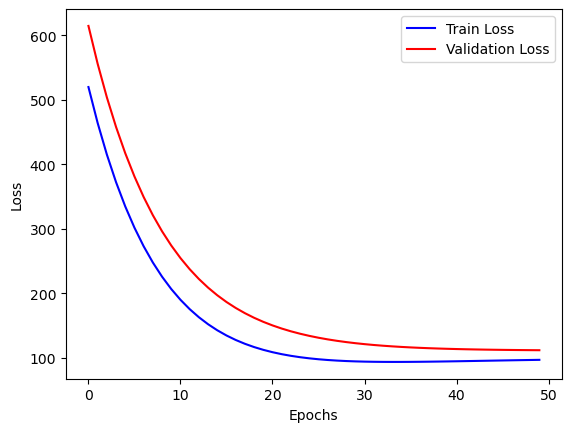

In [208]:
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(loss_list_train,'b', label = "Train Loss")
plt.plot(loss_list_valid,'r', label = "Validation Loss")
plt.legend(loc = "upper right")

In [209]:
print("Test loss:{:.4f}".format(loss(x_test, y_test, W, B).numpy()))

Test loss:92.9122


In [210]:
test_house_id = np.random.randint(0, len(x_test))
y = y_test[test_house_id]
y_pred = model(x_test, W,B)[test_house_id]
y_prediction = tf.reshape(y_pred,()).numpy()
print("House id: ", test_house_id, ", Actural house value:" , y, ", Prediction: ", y_prediction)

House id:  27 , Actural house value: 23.7 , Prediction:  27.671577


In [211]:
print(W)
print(B)

<tf.Variable 'Variable:0' shape=(12, 1) dtype=float32, numpy=
array([[0.7323222],
       [3.2577877],
       [1.5353239],
       [1.3618577],
       [1.9337152],
       [5.862553 ],
       [4.900774 ],
       [0.7768651],
       [1.8083956],
       [2.9452863],
       [6.1591287],
       [1.6953689]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([8.913606], dtype=float32)>
